In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [2]:
# Load the data
train_data = pd.read_csv('Project 1 dataset/train.csv')
test_data = pd.read_csv('Project 1 dataset/test.csv')

#print(train_data.head())
#Variables Given: id, title, author, text, label

#print(test_data.head())
#Variables Given: id, title, author, text


In [3]:
# Combine the text columns into one for feature extraction
train_text = train_data['title'] + ' ' + train_data['author'] + ' ' + train_data['text']
test_text = test_data['title'] + ' ' + test_data['author'] + ' ' + test_data['text']

In [4]:
# Define stop words to remove from text
stop_words = set(stopwords.words('english'))

#Retrieves a set of stop words for the English language from the corpus.
#Assigns the set of stop words to the variable "stop_words" for use in text preprocessing to remove common words that may not be informative for the task at hand.

In [5]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

#Lemmatization is the process of reducing a word to its base form (called lemma) by applying linguistic rules 
#It can help in reducing the sparsity of the feature matrix and improve the performance of text classification models.

In [6]:
# Define a function for text preprocessing
def preprocess_text(text):
    if type(text) == float:
        # If the text is a missing value (NaN), replace it with an empty string
        text = ''
    # Tokenize the text
    words = word_tokenize(text.lower())

    # Remove stop words and words with less than 3 characters
    words = [word for word in words if word not in stop_words and len(word) > 2]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Return the processed text as a string
    return ' '.join(words)

# Preprocess the text
train_text = train_text.apply(preprocess_text)
#print(train_text)
test_text = test_text.apply(preprocess_text)
#print(test_text)

In [7]:
# Extract features using TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
#ngram_range=(1, 2) specifies that the vectorizer should consider unigrams and bigrams as features.
#max_features=10000 limits the maximum number of features to 10,000.

train_features = vectorizer.fit_transform(train_text)
#transform the text data into a matrix of TF-IDF features

#print(train_features)
test_features = vectorizer.transform(test_text)
#print(test_features)

#The reason were are doing this is to extract features from the text data using the Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer
#This is a common technique in natural language processing for converting raw text into a numerical representation that can be used as input to machine learning algorithms.

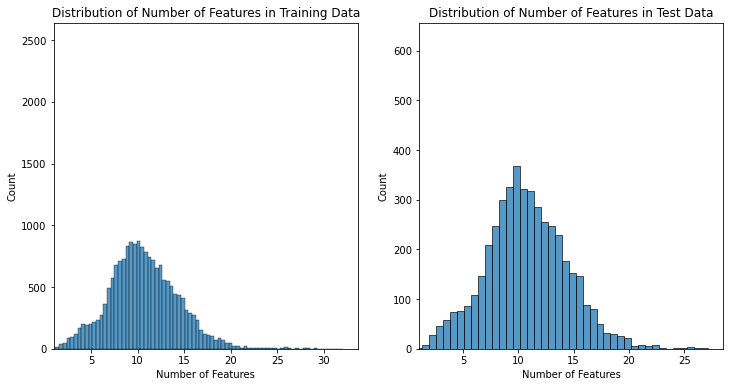

In [8]:
train_feature_counts = train_features.sum(axis=1).A1
#calculates the sum of features in each training sample and saves the result as an array.

test_feature_counts = test_features.sum(axis=1).A1
#calculates the sum of features in each test sample and saves the result as an array.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#creates a figure with two subplots. 

sns.histplot(train_feature_counts, ax=ax[0])
#creates a histogram of the distribution of feature counts in the training data and plots it on the first subplot.

ax[0].set_title('Distribution of Number of Features in Training Data')
ax[0].set_xlabel('Number of Features')
ax[0].set_xlim(left=1) # set the lower limit of x-axis to 1

sns.histplot(test_feature_counts, ax=ax[1])
ax[1].set_title('Distribution of Number of Features in Test Data')
ax[1].set_xlabel('Number of Features')
ax[1].set_xlim(left=1) # set the lower limit of x-axis to 1

plt.show()

#The output tells us that:
#Most of the documents have a small number of unique features, with very few documents having a large number of unique features.
#These features are crucial for distinguishing between different classes in the dataset.
#The most informative features are likely to be those that occur in a small number of documents, which is typical of text data.

Fold 1
Accuracy: 0.9456730769230769
Precision: 0.9458548650106045
Recall: 0.9456730769230769
F1 score: 0.9456675386891091
Fold 2
Accuracy: 0.9487980769230769
Precision: 0.9490679975258685
Recall: 0.9487980769230769
F1 score: 0.948778772339845
Fold 3
Accuracy: 0.9459134615384616
Precision: 0.9459576688361943
Recall: 0.9459134615384616
F1 score: 0.9459066290247101
Fold 4
Accuracy: 0.8194711538461539
Precision: 0.8458813125295015
Recall: 0.8194711538461539
F1 score: 0.8164163779226751
Fold 5
Accuracy: 0.8283653846153847
Precision: 0.85433097128838
Recall: 0.8283653846153847
F1 score: 0.8258749667571563


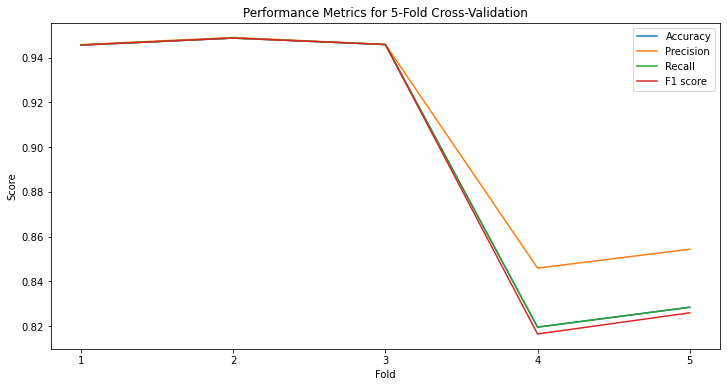

In [9]:
# Initialize lists to store performance metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=47)

for i, (train_indices, val_indices) in enumerate(kfold.split(train_features)):
    print('Fold', i+1)
    # Split the data into training and validation sets for this fold
    X_train, y_train = train_features[train_indices], train_data['label'][train_indices]
    X_val, y_val = train_features[val_indices], train_data['label'][val_indices]

    # Train a Naive Bayes classifier on the training data for this fold
    clf = MultinomialNB()
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the validation data for this fold
    y_pred = clf.predict(X_val)

    # Calculate performance metrics for this fold
    accuracy = accuracy_score(y_val, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred, average='weighted')

    # Print performance metrics for this fold
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 score:', f1_score)

    # Store performance metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

# Plot performance metrics for each fold
plt.figure(figsize=(12, 6))

plt.plot(range(1, 6), accuracies, label='Accuracy')
plt.plot(range(1, 6), precisions, label='Precision')
plt.plot(range(1, 6), recalls, label='Recall')
plt.plot(range(1, 6), f1_scores, label='F1 score')

plt.title('Performance Metrics for 5-Fold Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.xticks(range(1, 6))
plt.legend()

plt.show()

In [10]:
# Calculate the average evaluation metrics over all folds
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

print('Accuracy:', mean_accuracy)
print('Precision:', mean_precision)
print('Recall:', mean_recall)
print('F1-score:', mean_f1_score)

Accuracy: 0.8976442307692307
Precision: 0.9082185630381098
Recall: 0.8976442307692307
F1-score: 0.8965288569466991
